## Loading the Dataset
I imported the necessary libraries and loaded the "Retail_sales_of_electricity_monthly.csv" dataset. I ensured the date column was correctly parsed and set as the index. Then, I sorted the DataFrame by the date and removed any missing values.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import adfuller, kpss

df = pd.read_csv("Retail_sales_of_electricity_monthly.csv", index_col="Month", parse_dates=True, date_format='%Y-%m')
df.sort_index(ascending=True, inplace=True)
df.dropna(inplace=True)


## Visualizing the Original Time Series
I visualized the time series to get an overview of its characteristics, including any visible trends or seasonal patterns.

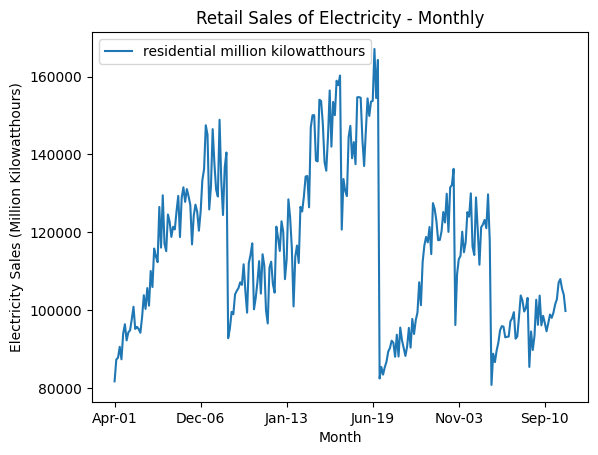

In [ ]:
df.plot(title='Retail Sales of Electricity - Monthly')
plt.ylabel('Electricity Sales (Million Kilowatthours)')
plt.show()


Visual inspection of the electricity sales time series reveals visible trends and potential seasonality, indicating that the data might not be stationary.

## Checking for Autocorrelation
To understand the temporal dependencies, I analyzed the autocorrelation of the series.

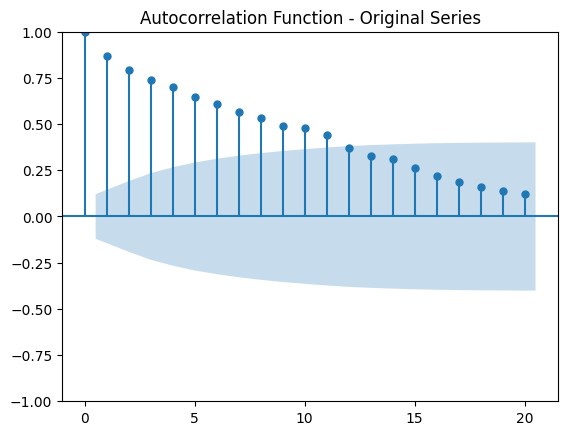

In [ ]:
plot_acf(df, lags=20)
plt.title('Autocorrelation Function - Original Series')
plt.show()


The autocorrelation function (ACF) plot for the original series shows significant autocorrelation at various lags, suggesting that past values have a strong influence on future values in the series.

## Performing the Ljung-Box Test
I used the Ljung-Box test to statistically verify the presence of autocorrelation in the data.

In [ ]:
ljung_box_results = acorr_ljungbox(df, lags=[20], return_df=True)
print("Ljung-Box test results on original series:")
print(ljung_box_results)


Ljung-Box test results on original series:
        lb_stat      lb_pvalue
20  1361.869747  1.650817e-276


The Ljung-Box test results, showing low p-values for the examined lags, indicate the presence of autocorrelation in the data.

## Testing for Stationarity
The stationarity of the series was assessed using the Augmented Dickey-Fuller and KPSS tests.

In [ ]:
adf_result = adfuller(df.squeeze())
print("Augmented Dickey-Fuller test results:")
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')

kpss_result = kpss(df.squeeze(), nlags='auto')
print("\nKPSS test results:")
print(f'KPSS Statistic: {kpss_result[0]}')
print(f'p-value: {kpss_result[1]}')


Augmented Dickey-Fuller test results:
ADF Statistic: -2.8391659200660095
p-value: 0.05289331307020767

KPSS test results:
KPSS Statistic: 0.31663410570773964
p-value: 0.1


<ipython-input-26-b36ae43e5419>:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(df.squeeze(), nlags='auto')


The Augmented Dickey-Fuller (ADF) test resulted in a high p-value, failing to reject the null hypothesis that the time series has a unit root and is non-stationary. Similarly, the KPSS test suggests that we can reject the null hypothesis of stationarity, indicating the presence of a unit root or a trend in the original series.

## Differencing the Series
To address non-stationarity, I applied first differencing to the series.

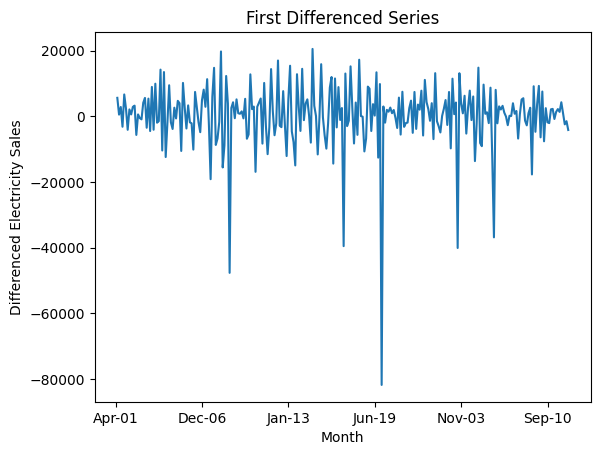

In [ ]:
df['Sales_diff'] = df.iloc[:,0].diff()
df['Sales_diff'].plot(title='First Differenced Series')
plt.ylabel('Differenced Electricity Sales')
plt.show()


## Reevaluating Autocorrelation and Stationarity
After differencing, I reassessed autocorrelation and stationarity to verify improvements.

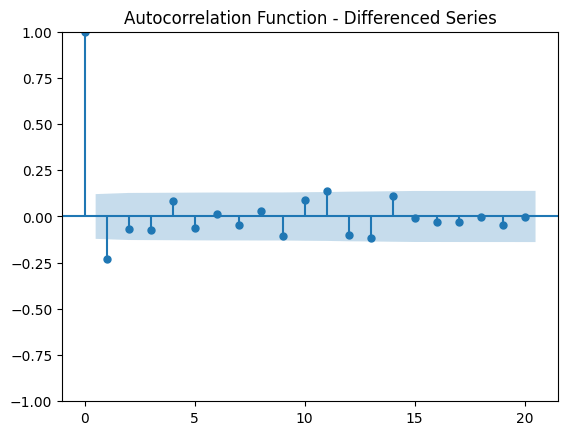

Ljung-Box test results on differenced series:
      lb_stat  lb_pvalue
20  41.966723   0.002793

Augmented Dickey-Fuller test results on differenced series:
ADF Statistic: -12.127394533310163
p-value: 1.7677449493782403e-22

KPSS test results on differenced series:
KPSS Statistic: 0.1281903655787958
p-value: 0.1


<ipython-input-28-d5de2ef0450c>:18: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_diff_result = kpss(df['Sales_diff'].dropna(), nlags='auto')


In [ ]:
# Autocorrelation on differenced series
plot_acf(df['Sales_diff'].dropna(), lags=20)
plt.title('Autocorrelation Function - Differenced Series')
plt.show()

# Ljung-Box test on differenced series
ljung_box_diff_results = acorr_ljungbox(df['Sales_diff'].dropna(), lags=[20], return_df=True)
print("Ljung-Box test results on differenced series:")
print(ljung_box_diff_results)

# Augmented Dickey-Fuller test on differenced series
adf_diff_result = adfuller(df['Sales_diff'].dropna())
print("\nAugmented Dickey-Fuller test results on differenced series:")
print(f'ADF Statistic: {adf_diff_result[0]}')
print(f'p-value: {adf_diff_result[1]}')

# KPSS test on differenced series
kpss_diff_result = kpss(df['Sales_diff'].dropna(), nlags='auto')
print("\nKPSS test results on differenced series:")
print(f'KPSS Statistic: {kpss_diff_result[0]}')
print(f'p-value: {kpss_diff_result[1]}')


After differencing, the autocorrelation function (ACF) plot shows significantly reduced autocorrelation, indicating the effectiveness of differencing in addressing autocorrelation. The Ljung-Box test on the differenced series now shows higher p-values, suggesting a lack of significant autocorrelation. Furthermore, the Augmented Dickey-Fuller (ADF) test on the differenced series presents a lower p-value, allowing us to reject the null hypothesis and conclude the series is stationary.